In [64]:
import numpy as np
import matplotlib.pyplot as plt

In [65]:
file = np.genfromtxt('../peg3_135m15.lf',skip_header=8,names=True)

In [66]:
file.dtype.names

('N', 'F606W', 'Log10N', 'Log10dN')

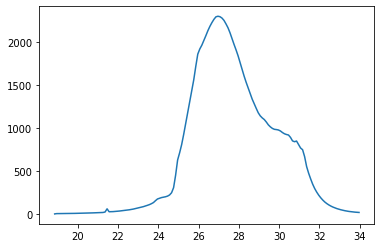

In [67]:
plt.plot(file['F606W']+21.66,10**file['Log10dN'])

plt.show()

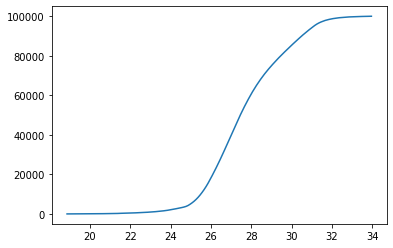

In [68]:
plt.plot(file['F606W']+21.66,10**file['Log10N'])

plt.show()

In [69]:
idx1 = np.logical_and(file['F606W']+21.66<=22.6,file['F606W']+21.66>=22.5)

In [70]:
cut1 = file[idx1]

In [71]:
print(cut1['F606W']+21.66)
print(10**cut1['Log10dN'])

[22.563]
[48.33926025]


In [72]:
6/48.33

0.12414649286157667

In [73]:
cat = np.genfromtxt('/Volumes/Samsung_T5/photRun0520/drcPhot29Apr/catDir_PEGASUS-III/PEGASUS-III_fullCat.dat',
                    names=True)

In [74]:
print(min(cat['magr_f606w']),max(cat['magr_f606w']))

18.948212444403502 28.41742738562322


In [75]:
(28.4-18.8)/0.1

95.99999999999997

In [76]:
test = np.linspace(18.9,28.5,97) # setting up bins in 0.1 steps

In [77]:
trial = np.digitize(file['F606W']+21.66,bins=test) # sorting the LF rows into the bins based on their magnitudes
# everything beyond the last bin, 28.5 here, is in bin 97

In [78]:
# x = np.array([17,18.853,18.953,19.053,19.15])
# bins = np.array([18.9,19,19.1,19.2])
# inds = np.digitize(x, bins)
# print(inds)
# for n in range(x.size):
#     print(bins[inds[n]-1], "<=", x[n], "<", bins[inds[n]])

In [79]:
len(test)

97

In [80]:
file['F606W'][:5] + 21.66

array([18.863, 18.963, 19.063, 19.163, 19.263])

In [81]:
18.95 - file['F606W'][0]

21.747

In [82]:
file['F606W'][0]+21.75

18.953

In [83]:
bin_sum = [(10**file['Log10dN'][trial == i]).sum() for i in range(0, len(test))]
# adding up the number of stars for the binned magnitudes

In [84]:
scale = np.array(bin_sum)*0.048 # scaling by the normalization for 100% at 23

In [85]:
scale[0]

0.012824523490166141

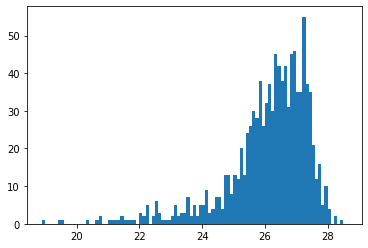

In [86]:
fig,ax = plt.subplots()
test2 = ax.hist(cat['magr_f606w'],bins=np.hstack((test,test[-1]+0.1))) # binning the actual data
# bins term is to make the last bin go from 28.5 to 28.6

In [87]:
# err_arr = np.zeros(len(file))
# for ii in range(len(file)):
#     s = np.random.randint(-100,101,1000)
#     vals = 10**file['Log10dN'][ii] + (np.sqrt(10**file['Log10dN'][ii]) * s/100)
#     err_arr[ii] = np.std(vals)

In [88]:
# count, bins, ignored = plt.hist(err_arr, 30, density=True)

In [89]:
# count, bins, ignored = plt.hist(s, 30, density=True)

In [90]:
sub = scale-test2[0]

In [91]:
center = (test[:-1] + test[1:]) / 2

In [92]:
len(center)

96

In [93]:
file['F606W'][1]+21.66 # 18.863 should be plotted at 18.95? plot it at the center

18.963

In [94]:
center2 = np.hstack((center,center[-1]+0.1))

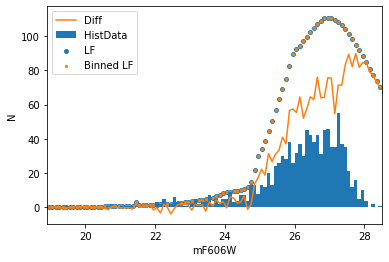

In [95]:
fig,ax = plt.subplots()

# ax.hist2d(file['F606W']+21.66,10**file['Log10dN']*2/73,bins=test)
ax.hist(cat['magr_f606w'],bins=test,label='HistData')
ax.plot(center,sub[1:],label='Diff') # test is the right side of the bins, sub is the number difference at each bin
ax.scatter(file['F606W']+21.66-0.013,(10**file['Log10dN'])*0.048,label='LF',s=15) # Scaled LF
ax.scatter(center,scale[1:],s=5,label='Binned LF')

ax.set_xlim(18.9,28.5)
# ax.set_xlim(18.8,19.5)
ax.set_xlabel('mF606W')
ax.set_ylabel('N')

ax.legend()

plt.show()

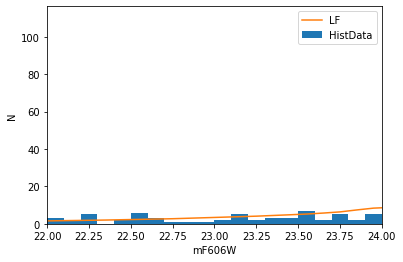

In [96]:
fig,ax = plt.subplots()

# ax.hist2d(file['F606W']+21.66,10**file['Log10dN']*2/73,bins=test)
hist_out = ax.hist(cat['magr_f606w'],bins=test,label='HistData')
# ax.plot(center,sub[1:],label='Diff') # test is the right side of the bins, sub is the number difference at each bin
ax.plot(file['F606W']+21.66-0.013,(10**file['Log10dN'])*0.048,label='LF')
# ax.plot(file['F606W']+21.66-0.013,(10**file['Log10dN'])*2/73,label='LF')# Scaled LF
# ax.scatter(center,scale[1:],s=5,label='Binned LF')

ax.set_xlim(22,24)
# ax.set_xlim(18.8,19.5)
ax.set_xlabel('mF606W')
ax.set_ylabel('N')

ax.legend()

plt.show()

In [97]:
hist_out[0]

array([ 1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  1.,  2.,  0.,  0.,  1.,  1.,  1.,  1.,  2.,
        1.,  1.,  1.,  1.,  0.,  3.,  2.,  5.,  0.,  2.,  6.,  3.,  1.,
        1.,  1.,  2.,  5.,  2.,  3.,  3.,  7.,  2.,  5.,  2.,  5.,  5.,
        9.,  3.,  4.,  7.,  7.,  4., 13., 13.,  8., 13., 12., 20., 13.,
       24., 26., 30., 28., 38., 26., 32., 37., 30., 45., 42., 38., 42.,
       31., 45., 46., 35., 35., 55., 37., 35., 21., 12., 16.,  5., 10.,
        4.,  0.,  2.,  0.,  1.])

In [98]:
idx = np.logical_and(cat['magr_f606w']<=22.6,cat['magr_f606w']>=22.5)

In [99]:
cut = cat[idx]
print(len(cut))

6


In [100]:
(24-22)/0.1

20.0

In [101]:
(0.05-0.04)/0.001

10.000000000000002

In [102]:
def diff_func(lf_mag,lf_num,dat,norm,dm=21.66):
    
#     fig,ax = plt.subplots()
    
    bins = np.linspace(22,24,21)
    
    idxes = np.digitize(lf_mag+dm,bins=bins)
    bin_sum = [(10**lf_num[idxes == i]).sum() for i in range(0, len(bins))]
    
    scaled = np.array(bin_sum)*norm
    
    dat_binned = ax.hist(dat,bins=np.hstack((bins,bins[-1]+0.1)))
    
    chi_sq = (scaled[1:]-dat_binned[0][1:])**2/scaled[1:]
#     chi_sq = (scaled[1:]-dat_binned[0][1:])**2/np.sqrt(dat_binned[0][1:])**2
#     plt.close()
    
    return chi_sq.sum()
    

In [103]:
norm_arr = np.linspace(0.04,0.05,11)

In [104]:
# chi_arr = np.zeros((len(norm_arr)))
# for nn, val in enumerate(norm_arr):
#     chi_arr[nn] = diff_func(file['F606W'],file['Log10dN'],cat['magr_f606w'],val,dm=21.66)

In [105]:
# np.argsort(chi_arr)

In [106]:
# chi_arr[np.argsort(chi_arr)]

In [107]:
(norm_arr[8],norm_arr[7])

(0.048, 0.047)

In [108]:
# chi_arr[4]

In [109]:
# 10**file['log10dN']*file['F606W'] # number of stars in a bin, magnitude of that bin?

In [110]:
print(min(file['F606W']),max(file['F606W']))

-2.797 12.303


In [111]:
(12.4+2.7)/0.1

151.0

In [112]:
test_arr = np.linspace(-2.8,12.4,153)

In [113]:
test_arr[:5]

array([-2.8, -2.7, -2.6, -2.5, -2.4])

In [114]:
print(len(test_arr))
print(len(file['F606W']))

153
152


In [115]:
print(file['F606W'][0])
print(test_arr[0])

-2.797
-2.8


In [116]:
10**(-0.4*-2.8)

13.182567385564068

In [117]:
def sum_mag(logdN,mag,bins,scale):

    temp =  10**(-0.4*mag) * scale * (10**logdN) 
    empt = np.zeros((len(temp)))
    for tt in range(len(temp)):
        df = abs(10**(-0.4 * (bins[tt+1])) - 10**(-0.4 * (bins[tt])))
        empt[tt] = temp[tt]*df
    # calculate bin width (which changes) in flux from magnitude
    # flux of a given star * scale * number of stars at that magnitude point
    
    val = -2.5 * np.log10(empt.sum())
    
    return val
        

In [121]:
def err_mag(logdN,mag,bins,scale,num=100):

    new_mags = np.zeros(num)
    new_logs = np.zeros(len(logdN))
    
    for jj in range(len(new_mags)):
        s = np.random.randint(-100,101,len(logdN))
        for ii in range(len(logdN)):
            temp_val = 10**file['Log10dN'][ii] + (np.sqrt(10**file['Log10dN'][ii]) * s[ii]/100)
            if temp_val < 0:
                loop = True
                while loop:
                    ss = np.random.randint(-100,101,1)
                    temp_val = 10**file['Log10dN'][ii] + (np.sqrt(10**file['Log10dN'][ii]) * ss/100)
                    if temp_val >= 0:
                        loop = False
            new_logs[ii] = np.log10(temp_val)
            
        new_mags[jj] = sum_mag(new_logs,mag,bins,scale)
    print(new_mags)   
    val = np.std(new_mags)
    
    return val

In [119]:
mag1 = sum_mag(file['Log10dN'],file['F606W'],bins=test_arr,scale=0.048)
print(mag1) # ~ -3.4

-3.3120355359331484


In [122]:
err1 = err_mag(file['Log10dN'],file['F606W'],bins=test_arr,scale=0.048,num=100)
print(err1)

[-3.25053786 -3.41146208 -3.18411886 -3.32036116 -3.37685134 -3.29364547
 -3.30072726 -3.43806738 -3.38444482 -3.34053949 -3.36322141 -3.29886246
 -3.36058788 -3.40811034 -3.30508759 -3.3088721  -3.36599242 -3.37005008
 -3.26696119 -3.2925744  -3.34839028 -3.32125473 -3.2509926  -3.32130517
 -3.2165202  -3.13583693 -3.37951907 -3.42210393 -3.29001875 -3.29836555
 -3.36792708 -3.41255031 -3.28118199 -3.19809914 -3.25134921 -3.29915651
 -3.39047898 -3.32578577 -3.36772896 -3.22716186 -3.40947368 -3.40573886
 -3.23497869 -3.33191971 -3.33810291 -3.3670974  -3.25233356 -3.24257491
 -3.3898047  -3.27360469 -3.45848135 -3.34855511 -3.36965727 -3.20881114
 -3.26199156 -3.20747468 -3.34731319 -3.26420593 -3.08486311 -3.33895319
 -3.29725097 -3.27662795 -3.4200849  -3.30765768 -3.20759466 -3.36972643
 -3.34453902 -3.30955706 -3.36577336 -3.27939526 -3.26261915 -3.32815394
 -3.27804994 -3.24385959 -3.28262661 -3.39253574 -3.17294339 -3.36154198
 -3.32598915 -3.36596258 -3.29260097 -3.21802916 -3

In [62]:
def mag2lum(mag):
    
    L0 = 3.0128e28
    Lsun = 3.828e26

    num = L0 * 10**(-0.4 * mag)
    
    return num/Lsun

In [63]:
lum1 = mag2lum(mag1)
print(lum1)

1662.6949890858064


In [64]:
3.88e6/lum1

2333.5608908843387